Importing all of the libraries that are needed in the code:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
import math
import skimage
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from scipy.stats import bernoulli, binom
from sklearn.utils import shuffle
from scipy.stats import multivariate_normal
from matplotlib import pyplot
from sklearn import datasets
from sklearn.metrics import accuracy_score

from scipy.special import comb
import scipy.special as sc
from scipy.stats import beta
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn import datasets
import scipy.integrate as integrate
from scipy.special import erf

from numpy.linalg import linalg
from scipy.stats import multivariate_normal

from mpmath import *
from scipy.special import gamma, factorial

# Rashomon ratio for the affine functions applied on the mixture of two Gaussians

## One-dimensional case

We define a function that computes the excess (reducible) error of an affine function on a mixture of two Gaussians. It uses a parameter that characterizes the classifier - an angle theta, and parameters that characterize the probability distribution - the distance between the means (2mu), covariance (sigma^2) and prior (prior). We assume that the distribution is bipodal.

In [ ]:
def excess_error_compact_one_dim_bipodal(theta,mu,sigma,prior):
  x = prior*norm.cdf((np.sin(theta)*mu-np.cos(theta))/(sigma*(np.sin(theta))))+(1-prior)*norm.cdf((np.cos(theta)+np.sin(theta)*mu)/((np.sin(theta))*sigma))-norm.cdf(mu/(sigma))
  return -x

We provide an illustration of the proportion of the classifiers that belong to the Rashomon set: a point on a circle correspond to an affine classifier, its excess (reducible) error is computed using the previously defined function (excess_error_compact_one_dim_bipodal). We sample functions on the hypersphere in 3d using a Uniform distribution, plot the ones that belong to the Rashomon set in blue and the ones that do not in red. The proportion of blue functions over all sampled ones can serve as an estimate of the Rashomon ratio. In the paper, we give guarantees for such an estimation.

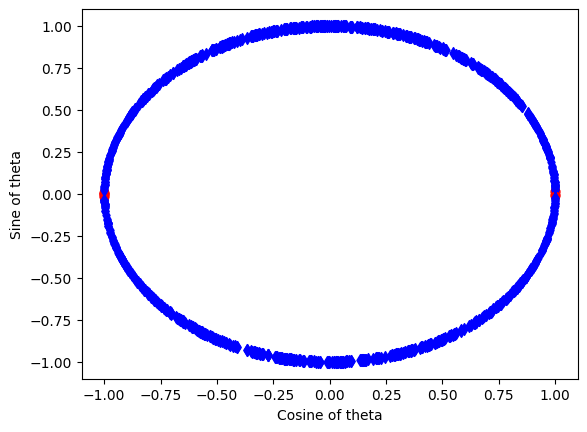

Rashomon ratio is approximately equal to  0.985


In [ ]:
# one-dimensional case
sample_size = 1000
d=1
mu = 50
sigma=1
gamma=0.05
small=0
theta = np.zeros((sample_size,d+1))
fig, ax = plt.subplots()
for i in range(sample_size):
  theta[i,:] = np.random.normal(0, 1, d+1)
  theta[i,:] = theta[i,:]/np.linalg.norm(theta[i,:])
  threshold_error = excess_error_compact_one_dim_bipodal(np.arccos(theta[i,0]), mu, sigma,0.5)
  x = theta[i,0]
  y = theta[i,1]
  if threshold_error<gamma:
    ax.scatter(x,y,marker='d', c='blue', label='inside Rashomon set')
    small=small+1
  else:
    ax.scatter(x,y,c='red', label='outside Rashomon set')
#ax.legend()
plt.xlabel('Cosine of theta')
plt.ylabel('Sine of theta')
plt.show()
print("Rashomon ratio is approximately equal to ", small/sample_size)

We use the Rashomon ratio estimation described in the previous cell to plot the trajectory of the Rashomon ratio as a function of the distance of the means in the Gaussian mixture. For each distance we sample classifiers (sample_size many functions) from a circle uniformly and estimate their Rashomon ratio. The value of gamma used in the estimation is 0.05 (gamma).

In [ ]:
# one-dimensional case
sample_size = 1000
d=1
sigma=1
gamma=0.05
length=100
ratio = np.zeros(length)
for j in range(length):
  mu = j/2
  small=0
  theta = np.zeros((sample_size,d+1))
  for i in range(sample_size):
    theta[i,:] = np.random.normal(0, 1, d+1)
    theta[i,:] = theta[i,:]/np.linalg.norm(theta[i,:])
    threshold_error = excess_error_compact_one_dim_bipodal(np.arccos(theta[i,0]), mu, sigma,0.5)
    if threshold_error<gamma:
      small=small+1
  ratio[j] = small/sample_size


The results of the previous cell are plotted in the following Figure. It confirms certain analytical properties proved in the paper. For example, it illustrates the fact, that the minimum is strictly larger than 0 and the limit of the Rashomon ratio as the distance between the means grows to infinity is 1.  

Text(0, 0.5, 'Rashomon ratio estimate')

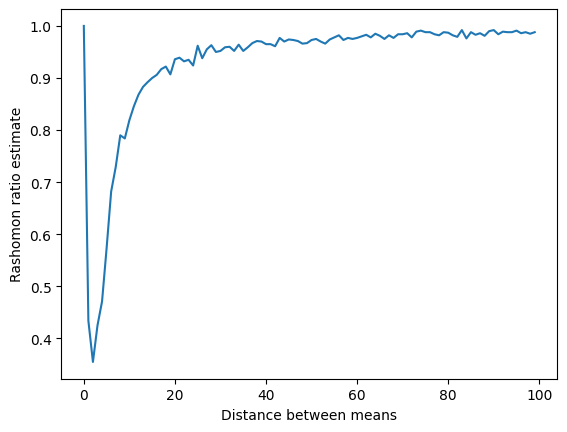

In [ ]:
plt.plot(ratio)
plt.xlabel('Distance between means')
plt.ylabel('Rashomon ratio estimate')

We show in detail, what happens in the interval [0,10] where the minimum of the
Rashomon ratio and an inflection point of its trajectory occur.

In [ ]:
# one-dimensional case
sample_size = 1000
d=1
sigma=1
gamma=0.05
length=1000
ratio = np.zeros(length)
division = np.linspace(0,10,length+1)
for j in range(length):
  #print(j)
  mu = division[j]/2
  small=0
  theta = np.zeros((sample_size,d+1))
  for i in range(sample_size):
    theta[i,:] = np.random.normal(0, 1, d+1)
    theta[i,:] = theta[i,:]/np.linalg.norm(theta[i,:])
    threshold_error = excess_error_compact_one_dim_bipodal(np.arccos(theta[i,0]), mu, sigma,0.5)
    if threshold_error<gamma:
      small=small+1
  ratio[j] = small/sample_size

([<matplotlib.axis.XTick at 0x7f8b127c3070>,
 [Text(0, 0, '0'),
  Text(100, 0, '1'),
  Text(200, 0, '2'),
  Text(300, 0, '3'),
  Text(400, 0, '4'),
  Text(500, 0, '5'),
  Text(600, 0, '6'),
  Text(700, 0, '7'),
  Text(800, 0, '8'),
  Text(900, 0, '9'),
  Text(1000, 0, '10')])

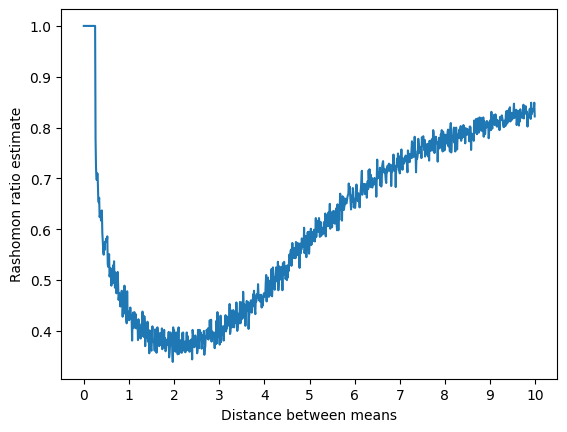

In [ ]:
plt.plot(ratio)
plt.xlabel('Distance between means')
plt.ylabel('Rashomon ratio estimate')
plt.xticks([0, 100, 200, 300,400,500, 600,700,800,900,1000], [0,1,2,3,4,5,6,7,8,9,10])

We show what is the minimal value of the Rashomon ratio and where it occurs (at what distance between the means - the number should be divided by 100):

In [ ]:
print(np.argmin(ratio))
print(min(ratio))

197
0.339


## Multi-dimensional case

A function that computes the excess (reducible) error of an affine classifier on a mixture of two Gaussians in a multi-dimensional setting. The classifier is characterized by the projection direction (p) and the threshold (f). The distribution is characterized by the two means (mu1, mu2), factor that multiplies the identity matrix to obtain the covariance matrix (sigma^2) and prior (prior).

In [ ]:
def excess_error_multidim(p,f,mu1,mu2,sigma, prior): #prior is the one that corresponds to mu1
  pnorm = np.linalg.norm(p)
  newmu1 = np.dot(p,mu1)
  newmu2 = np.dot(p,mu2)
  if max(newmu1,newmu2) == newmu2:
    prior = 1-prior
  error = norm.cdf(np.linalg.norm(mu2-mu1)/(2*sigma))-prior*norm.cdf((max(newmu1,newmu2)-f)/(sigma*pnorm))- (1-prior)*norm.cdf((f-min(newmu1,newmu2))/(pnorm*sigma))
return error

We provide an illustration of the two-dimensional case. Here, the functions are sampled from the unit hypersphere in 4d (which is equivalent to the sphere with radius 1). Blue dots correspond to functions that belong to the Rashomon set, while red dots do not belong to the Rashomon set. For the purposes of visualization, the results are projected into the plane using axis as projection directions.

0.266


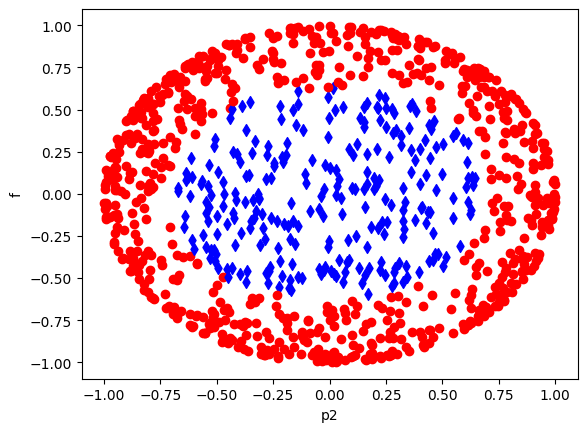

In [ ]:
sample_size = 1000
d=2
mu1=np.zeros(d)
mu2=np.zeros(d)
mu1[0] = 0.5
mu2[0] = -0.5
sigma=1
gamma=0.05
small=0
pf = np.zeros((sample_size,d+1))
for i in range(sample_size):
  pf[i,:] = np.random.normal(0, 1, d+1)
  pf[i,:] = pf[i,:]/np.linalg.norm(pf[i,:])
  error = excess_error_multidim(pf[i,:d], pf[i,d], mu1, mu2, sigma, 0.5)
  p1 = pf[i,0]
  p2 = pf[i,1]
  f = pf[i,2]
  if error<gamma:
    plt.scatter(p2,f,marker='d', c='blue')
    small=small+1
  else:
    plt.scatter(p2,f,c='red')
plt.xlabel('p2')
plt.ylabel('f')
print(small/sample_size)

Similarly, as in the one-dimensional case, the trajectory of the Rashomon ratio as a function of the distance between means is plotted. It again supports the theoretical findings of the paper.

In [ ]:
sample_size = 1000
d=10
sigma=1
gamma=0.05
length=100
ratio = np.zeros(length)
mu1 = np.zeros(d)
mu2 = np.zeros(d)
for j in range(length):
  mu1[0]=j/2
  mu2[0]=-j/2
  small=0
  pf = np.zeros((sample_size,d+1))
  for i in range(sample_size):
    pf[i,:] = np.random.normal(0, 1, d+1)
    pf[i,:] = pf[i,:]/np.linalg.norm(pf[i,:])
    error = excess_error_multidim(pf[i,:d], pf[i,d], mu1, mu2, sigma, 0.5)
    if error<gamma:
      small=small+1
  ratio[j] = (small/sample_size)

Text(0, 0.5, 'Rashomon ratio')

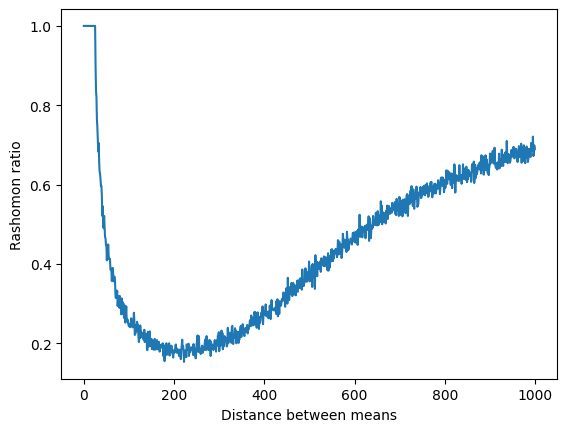

In [ ]:
plt.plot(ratio)
plt.xlabel('Distance between means')
plt.ylabel('Rashomon ratio')

We show the minimum value of the estimated Rashomon ratio as well as where it occurs (for what particular distance between the means).

In [ ]:
print(np.argmin(ratio))
print(min(ratio))

222
0.153


# Rashomon ratio of a two-layered neural networks applied to a dataset with complexity given by a combination of a modified Gram matrix and a vector of labels

## Theoretical lower bound applied to the Iris dataset

We upload and visualize the dataset used: Iris dataset (4 dimensional input, 100 datapoints), first two classes only:

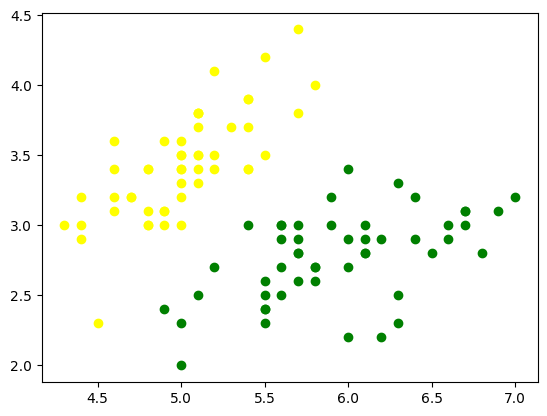

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#choose the first two classes only:
X = X[y != 2]
y = y[y != 2]

#shuffle the data:
from sklearn.utils import shuffle
X,y = shuffle(X,y)

#visualize the Iris dataset:
for i in range(X.shape[0]):
  if y[i]==1:
    plt.scatter(X[i,0],X[i,1], c='green')
  else:
    plt.scatter(X[i,0],X[i,1], c='yellow')

In [ ]:
#standardize the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

We define the function that computes the H^infty matrix (modified Gram matrix) for a given dataset:

In [4]:
def compute_H_infty(X):
  # n is the number of samples, X is the matrix of data with size (n,d)
  n = X.shape[0]
  H_infty_matrix = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      dot_product = np.dot(X[i,:],X[j,:])
      if dot_product<-1:
        dot_product=-1
      if dot_product>1:
        dot_product=1
      H_infty_matrix[i,j] = dot_product*(np.pi-np.arccos(dot_product))/(2*np.pi)
      # here needed to add rounding to the dot product, since arccos is not defined for >1
  return H_infty_matrix

We use function compute_H_infty to compute the complexity of the Iris dataset (restricted to the first two classes). This complexity is an approximation of the parameter epsilon from the paper.  

In [11]:
#normalize all entries of X so that their norm is 1 as is assumed in the paper:
for i in range(100):
  X_01[i,:] = X[i,:]/np.linalg.norm(X[i,:])

H_infty_matrix = compute_H_infty(X_01)
H_infty_inverse = np.linalg.inv(H_infty_matrix)
print('epsilon of the Iris dataset is approximately', np.sqrt(np.matmul(Y_01,np.matmul(H_infty_inverse,Y_01))))

epsilon of the Iris dataset is approximately 7.129648940451013


We define the function that corresponds to the lower bound of the Rashomon ratio from the paper. It depends on the dimension of the data (d), the numner of hidden nodes in the neural network (m), the value of gamma from the Rashomon ratio (gamma_number), the complexity of the dataset (epsilon), the parameter of initialization (kappa) and the tolerance (delta).

In [14]:
def lemma8_lowerbound(d,m,gamma_number,epsilon,kappa, delta):
  jacobi_theta = jtheta(3,0,exp(-9*epsilon**2/(2*kappa**2)))
  result = (1-delta)*2**(d*m)/(kappa*gamma(d*m/2+1))*(gamma_number/2)**(d*m/2)*exp(-epsilon**2/(2*kappa**2))*(0.5*jacobi_theta+1)**(d*m)
  return result

We plot how the lower bound changes with different values of kappa (parameter that affects the distribution over the hypothesis space). We plot three different curves that correspond to three different values of gamma (from the Rashomon ratio).

tick values are  [2.         3.63265306 5.26530612 6.89795918 8.53061224]


<ipython-input-6-420f5b16f821>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(tick_values,1), minor=False)


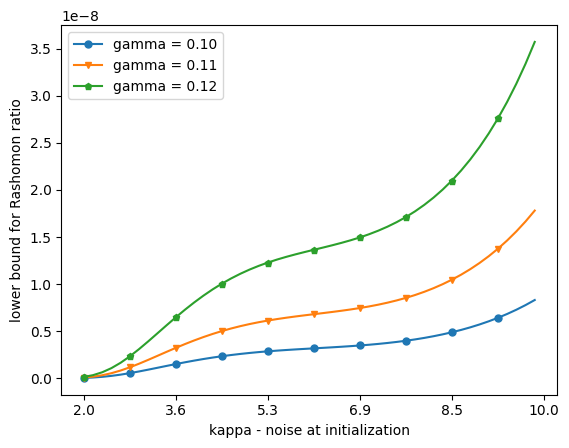

In [ ]:
length = 50
lower_bound = np.ones(length)
lower_bound_2 = np.ones(length)
lower_bound_3 = np.ones(length)
dimension = 4 # for iris dataset the data come from 4 dimensional space
epsilon = 7.13 #for iris dataset the value for epsilon is approximately 7.13 as computed previously
delta=0.1
down = 2
up = 10
m = 4
kappa_value = np.linspace(down, up, length)

for i in range(length):
  lower_bound[i]=lemma8_lowerbound(dimension,m,0.1,epsilon,kappa_value[i],delta)
  lower_bound_2[i]=lemma8_lowerbound(dimension,m,0.11,epsilon,kappa_value[i],delta)
  lower_bound_3[i]=lemma8_lowerbound(dimension,m,0.12,epsilon,kappa_value[i],delta)

tick_values = kappa_value[np.mod(np.arange(kappa_value.size), 10) == 0]
print('tick values are ',tick_values)
tick_values = np.append(tick_values,up)
tick_values = np.append(down, tick_values)
fig, ax = plt.subplots()
ax.set_xticklabels(np.round(tick_values,1), minor=False)
plt.plot(lower_bound, label='gamma = 0.10', marker = 'o', markevery=5, markersize=5)
plt.plot(lower_bound_2, label='gamma = 0.11', marker = 'v', markevery=5, markersize=5)
plt.plot(lower_bound_3, label='gamma = 0.12', marker = 'p', markevery=5, markersize=5)
plt.xlabel('kappa - noise at initialization')
plt.ylabel('lower bound for Rashomon ratio')
plt.legend()


## Sample-based estimation applied to the Iris dataset


We define a neural network model with one hidden layer with 4 hidden nodes and ReLU activation functions and with sigmoid activation function for the output.

In [ ]:
#define and compile the trained model (same architecture as the model that will use random weights):
width=4
model_trained = Sequential()
model_trained.add(Dense(width, input_dim=X.shape[1], activation='relu'))
model_trained.add(Dense(1, activation='sigmoid')) #alternatively tanh/sigmoid

learning_rate=0.25
from keras.optimizers import Adam
optimizer = Adam(learning_rate=learning_rate)
#model_trained.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])
model_trained.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

First, we train this model for an illustration of what accuracy can be achieved by training.

In [ ]:
#train the model_trained on the 0.8 of the Iris dataset:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=14)
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.fit_transform(X_val)

model_trained.fit(X_train, y_train, epochs=15, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/15
8/8 [==============================] - 1s 38ms/step - loss: 0.6323 - accuracy: 0.7250 - val_loss: 0.6029 - val_accuracy: 0.8500
Epoch 2/15
8/8 [==============================] - 0s 7ms/step - loss: 0.6218 - accuracy: 0.7750 - val_loss: 0.5925 - val_accuracy: 0.8500
Epoch 3/15
8/8 [==============================] - 0s 6ms/step - loss: 0.6111 - accuracy: 0.7875 - val_loss: 0.5824 - val_accuracy: 0.8500
Epoch 4/15
8/8 [==============================] - 0s 7ms/step - loss: 0.6002 - accuracy: 0.8125 - val_loss: 0.5724 - val_accuracy: 0.8500
Epoch 5/15
8/8 [==============================] - 0s 6ms/step - loss: 0.5898 - accuracy: 0.8375 - val_loss: 0.5620 - val_accuracy: 0.8500
Epoch 6/15
8/8 [==============================] - 0s 8ms/step - loss: 0.5788 - accuracy: 0.8375 - val_loss: 0.5511 - val_accuracy: 0.8500
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.5677 - accuracy: 0.8375 - val_loss: 0.5397 - val_accuracy: 0.8500
Epoch 8/15
8/8 [=================

In [ ]:
#evaluate the accuracy of the model (again on the entire Iris dataset - for our purposes we do not split into training, testing parts):
test_loss, test_acc = model_trained.evaluate(X,  y, verbose=2)

4/4 - 0s - loss: 0.4547 - accuracy: 0.9400 - 133ms/epoch - 33ms/step


Second, we generate weights of this model at random multiple times (length times)- without training. First layer follows Gaussian distribution with zero mean and identity covariance matrix stretched by kappa, second layer follows Rademacher distribution. We measure the accuracy of the models based on the whole dataset (100 points).

Using the measured accuracies, we estimate the Rashomon ratio for different values of kappa (range from 1 to 10) and three different values of gamma (0.10, 0.11, 0.12) so that we can plot a similar plot as in the analytical part of the paper.

In [ ]:
tries=10 #number of different kappa that we try for the distribution over the set of neural networks
length=10000 #number of neural networks that we sample to estimate the Rashomon ratio
accuracy = np.zeros(length)
ratio = np.zeros((3,tries))
#kappa = 2
d = X.shape[1] #dimension of the data
m = width #number of hidden nodes

for l in range(tries):
  for k in range(length):
    #generate random weights:
    kappa=tries
    random_weights = np.random.multivariate_normal(np.zeros(d*m), kappa*np.identity(d*m))
    random_weights_reshaped = np.reshape(random_weights,(4,4)) #TODO: replace 4,4 by m,d
    random_weights_second_layer = 2*(np.random.binomial(1,0.5,size=4)-0.5) #Rademacher distribution for the second layer
    #set the weights in the model:
    model_trained.layers[0].set_weights([np.transpose(random_weights_reshaped), np.zeros(4)]) # no bias
    model_trained.layers[1].set_weights([np.ones((4,1)), np.zeros(1)]) # no bias
    #evaluate accuracy
    accuracy[k] = model_trained.evaluate(X,y)[1]
  ratio[0,l] = np.sum(accuracy>1-0.1)/length
  ratio[1,l] = np.sum(accuracy>1-0.11)/length
  ratio[2,l] = np.sum(accuracy>1-0.12)/length

We plot a similar plot as was done for the analytical lower bound of the Rashomon ratio - this time it is based on an epirical estimation that uses 10000 sampled functions.

<ipython-input-12-0f905f3e4519>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(tick_values,0), minor=False)


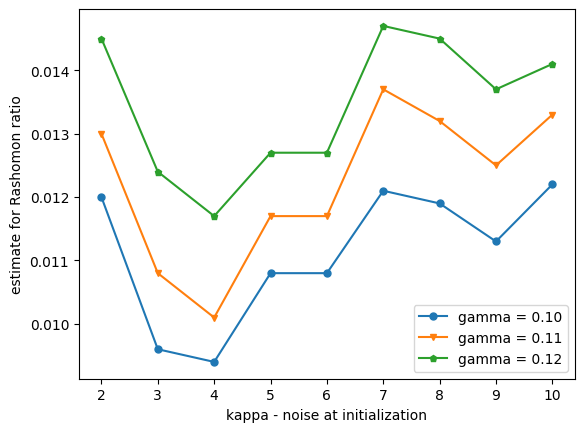

In [ ]:
tick_values = [1,2,3,4,5,6,7,8,9,10]
#print('tick values are ',tick_values)

fig, ax = plt.subplots()
ax.set_xticklabels(np.round(tick_values,0), minor=False)
plt.plot(ratio[0,:9], label='gamma = 0.10', marker = 'o', markevery=1, markersize=5)
plt.plot(ratio[1,:9], label='gamma = 0.11', marker = 'v', markevery=1, markersize=5)
plt.plot(ratio[2,:9], label='gamma = 0.12', marker = 'p', markevery=1, markersize=5)
plt.xlabel('kappa - noise at initialization')
plt.ylabel('estimate for Rashomon ratio')
plt.legend()